In [9]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [10]:
import ipywidgets
from ipywidgets import interact, interactive, Dropdown, widgets
from IPython.display import clear_output, display, HTML

In [11]:
import os
import pickle
import pprint
from glob import glob
os.chdir('/home/users/alexno/sleep-staging')

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from h5py import File

from utils.plotting import plot_psg_hypnogram_hypnodensity
from utils.plotting import plot_hypnodensity

In [12]:
available_predictions = glob("experiments/**/SSC-WSC_test_predictions.pkl", recursive=True)
pprint.pprint(available_predictions)

['experiments/massc/att30/20201124_080609/SSC-WSC_test_predictions.pkl',
 'experiments/massc/avg_kw21/20201126_043826/SSC-WSC_test_predictions.pkl']


In [13]:
selected_experiment = available_predictions[1]
with open(selected_experiment, 'rb') as f:
    predictions = pickle.load(f)
list_studies = list(predictions.keys())
df = pd.read_csv('overview_file_cohortsEM-ling1.csv')
df_preds = pd.read_csv(os.path.join(os.path.dirname(selected_experiment), 'SSC-WSC_test_results.csv'), index_col=0)
df_preds = pd.merge(left=df_preds, right=df[['ID', 'Diagnosis', 'Label']], how='left', right_on='ID', left_on='SubjectID')
display(df_preds.query('Label == 1').sort_values('Accuracy', ascending=True).head())

FileID   SubjectID Window Case  Accuracy  Balanced accuracy  \
355  SSC_5139_1.h5  SSC_5139_1    1 s  all  0.649302           0.714275   
299  SSC_1958_1.h5  SSC_1958_1    1 s  all  0.656039           0.700787   
306  SSC_4723_1.h5  SSC_4723_1    1 s  all  0.662694           0.680094   
300  SSC_2605_1.h5  SSC_2605_1    1 s  all  0.681190           0.622985   
315  SSC_4813_1.h5  SSC_4813_1    1 s  all  0.735939           0.597847   

        Kappa        F1  Precision    Recall  ...  Precision - N3  \
355  0.498503  0.585201   0.617166  0.714275  ...        0.447619   
299  0.480362  0.477659   0.486116  0.700787  ...        0.292453   
306  0.549286  0.599497   0.615273  0.680094  ...        0.994536   
300  0.568261  0.466644   0.542127  0.622985  ...        0.843836   
315  0.644742  0.610992   0.633843  0.597847  ...        0.000000   

     Recall - N3  Support - N3  F1 - REM  Precision - REM  Recall - REM  \
355     0.921569          51.0  0.836449         0.736626      0.967568   
299     0.756098          41.0  0.470588         0.307692      1.000000   
306     0.719368         253.0  0.896175         0.828283      0.976190   
300     0.950617         324.0  0.023810         0.012048      1.000000   
315     0.000000           5.0  0.859756         0.933775      0.796610   

     Support - REM          ID        Diagnosis  Label  
355          185.0  SSC_5139_1  'T1 NARCOLEPSY'      1  
299           16.0  SSC_1958_1  'T1 NARCOLEPSY'      1  
306          168.0  SSC_4723_1  'T1 NARCOLEPSY'      1  
300            1.0  SSC_2605_1  'T1 NARCOLEPSY'      1  
315          177.0  SSC_4813_1  'T1 NARCOLEPSY'      1  

[5 rows x 34 columns]

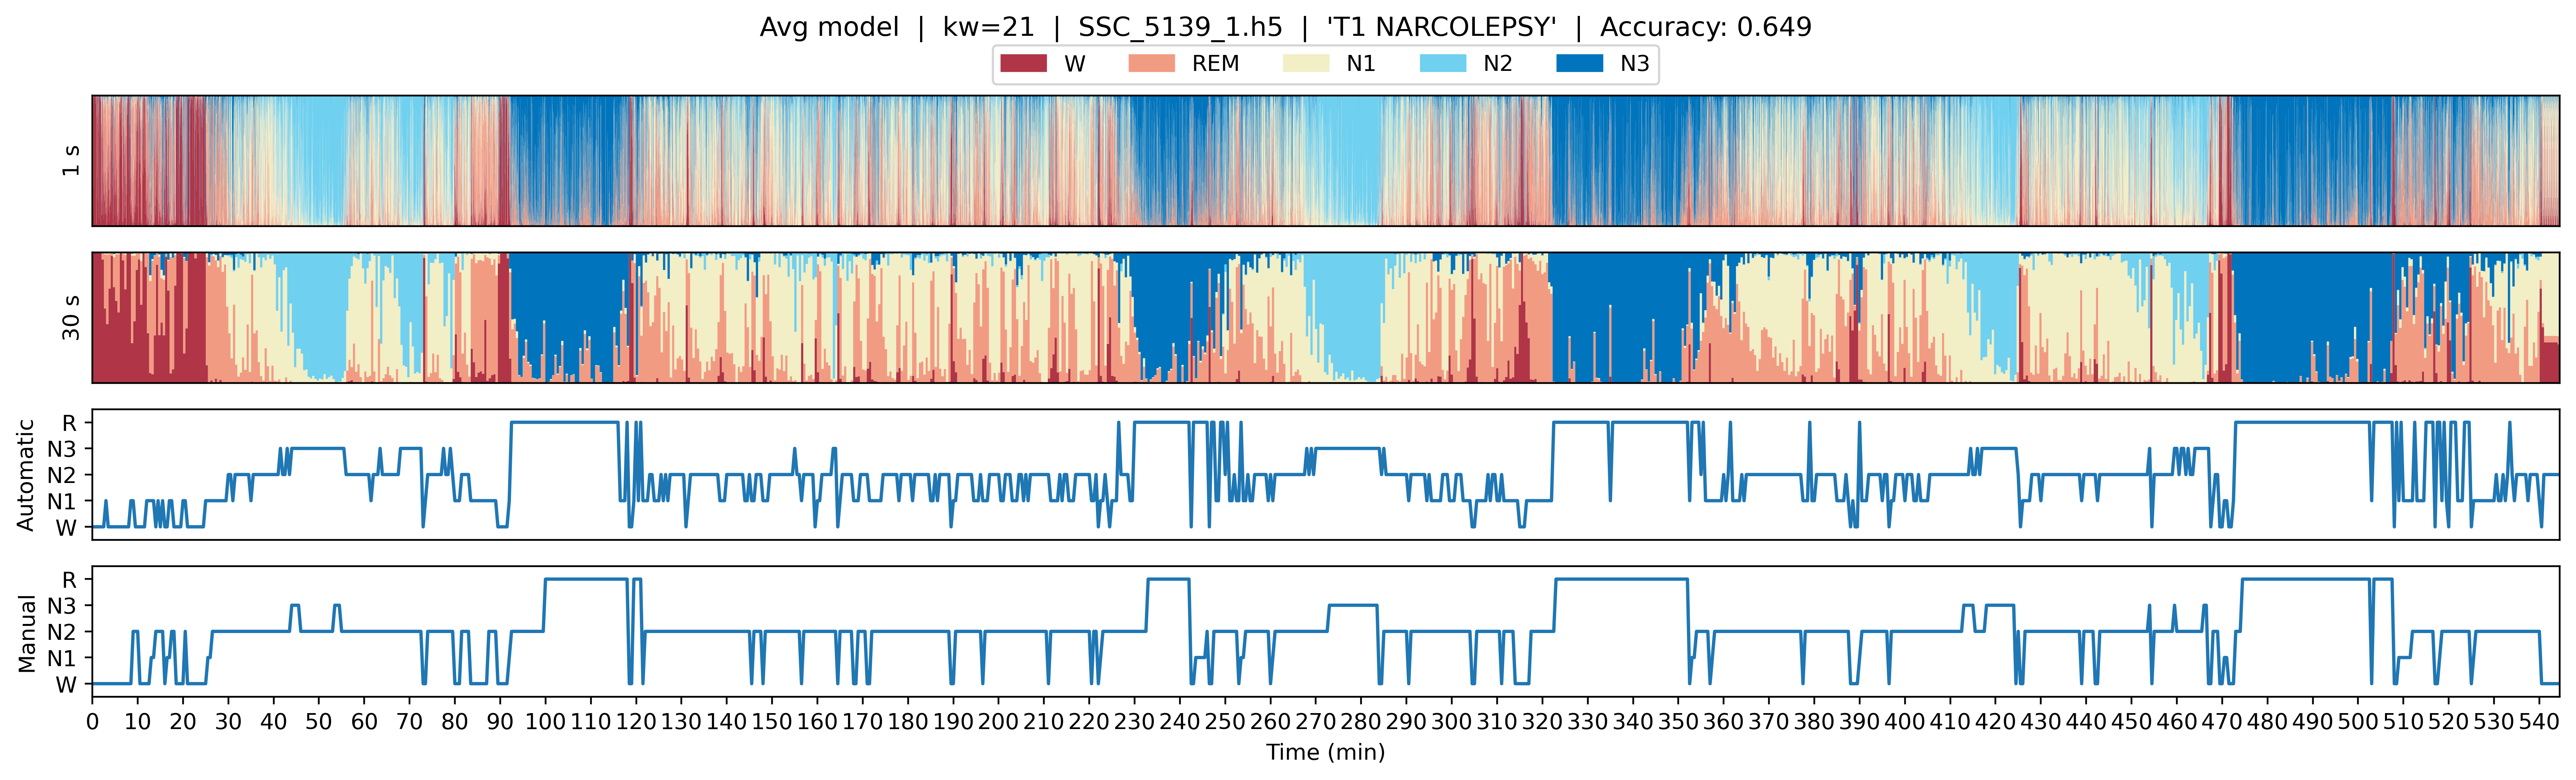

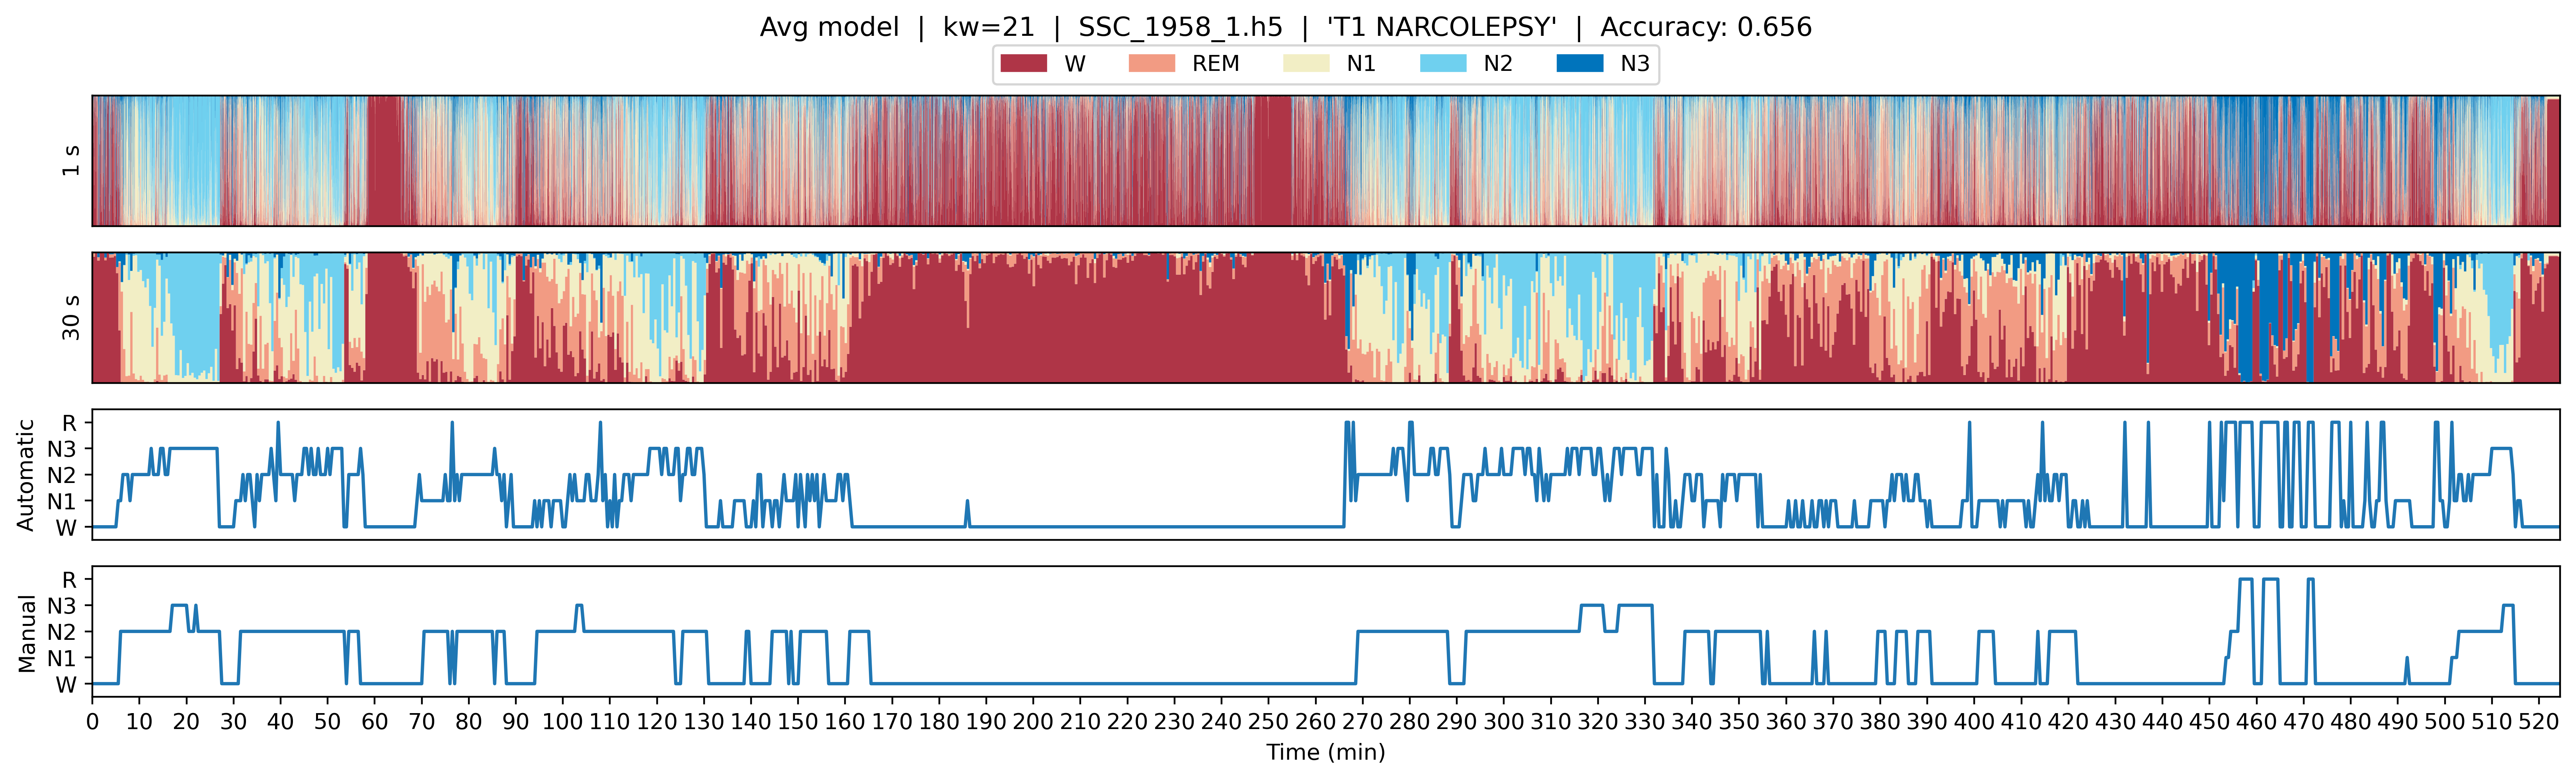

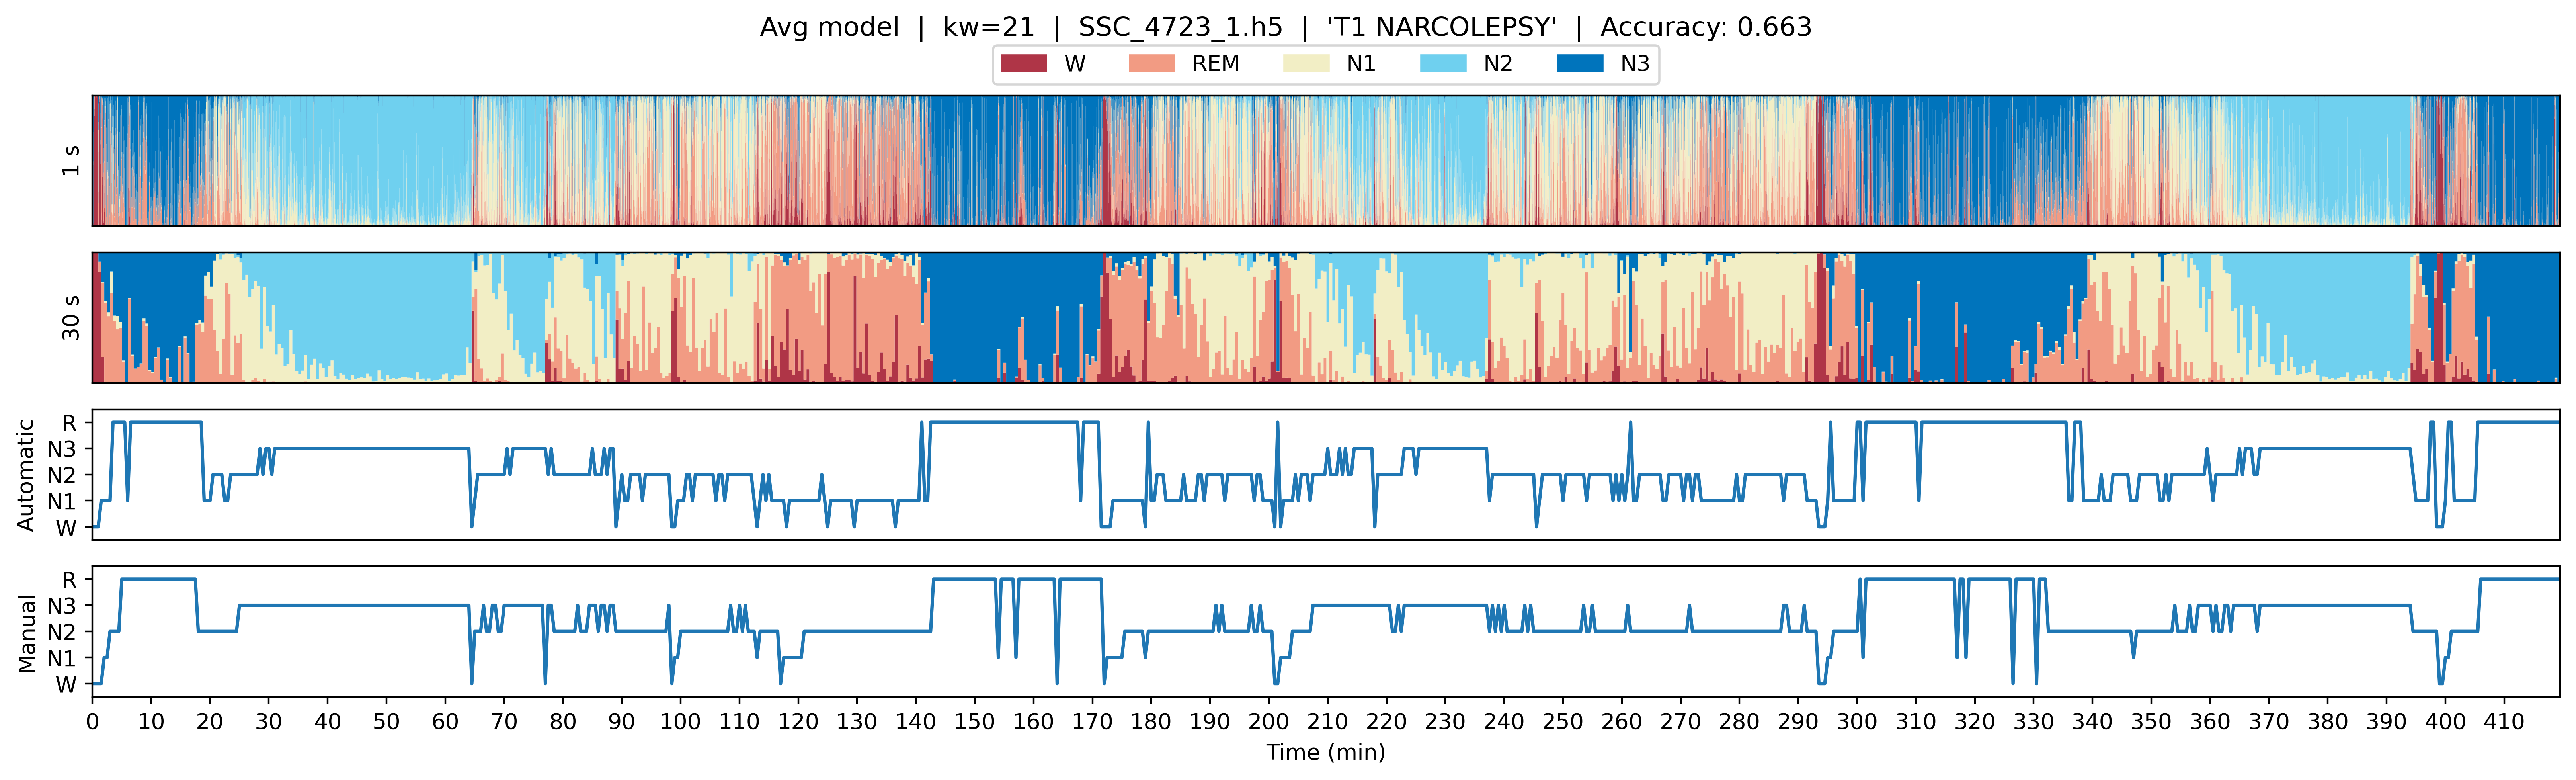

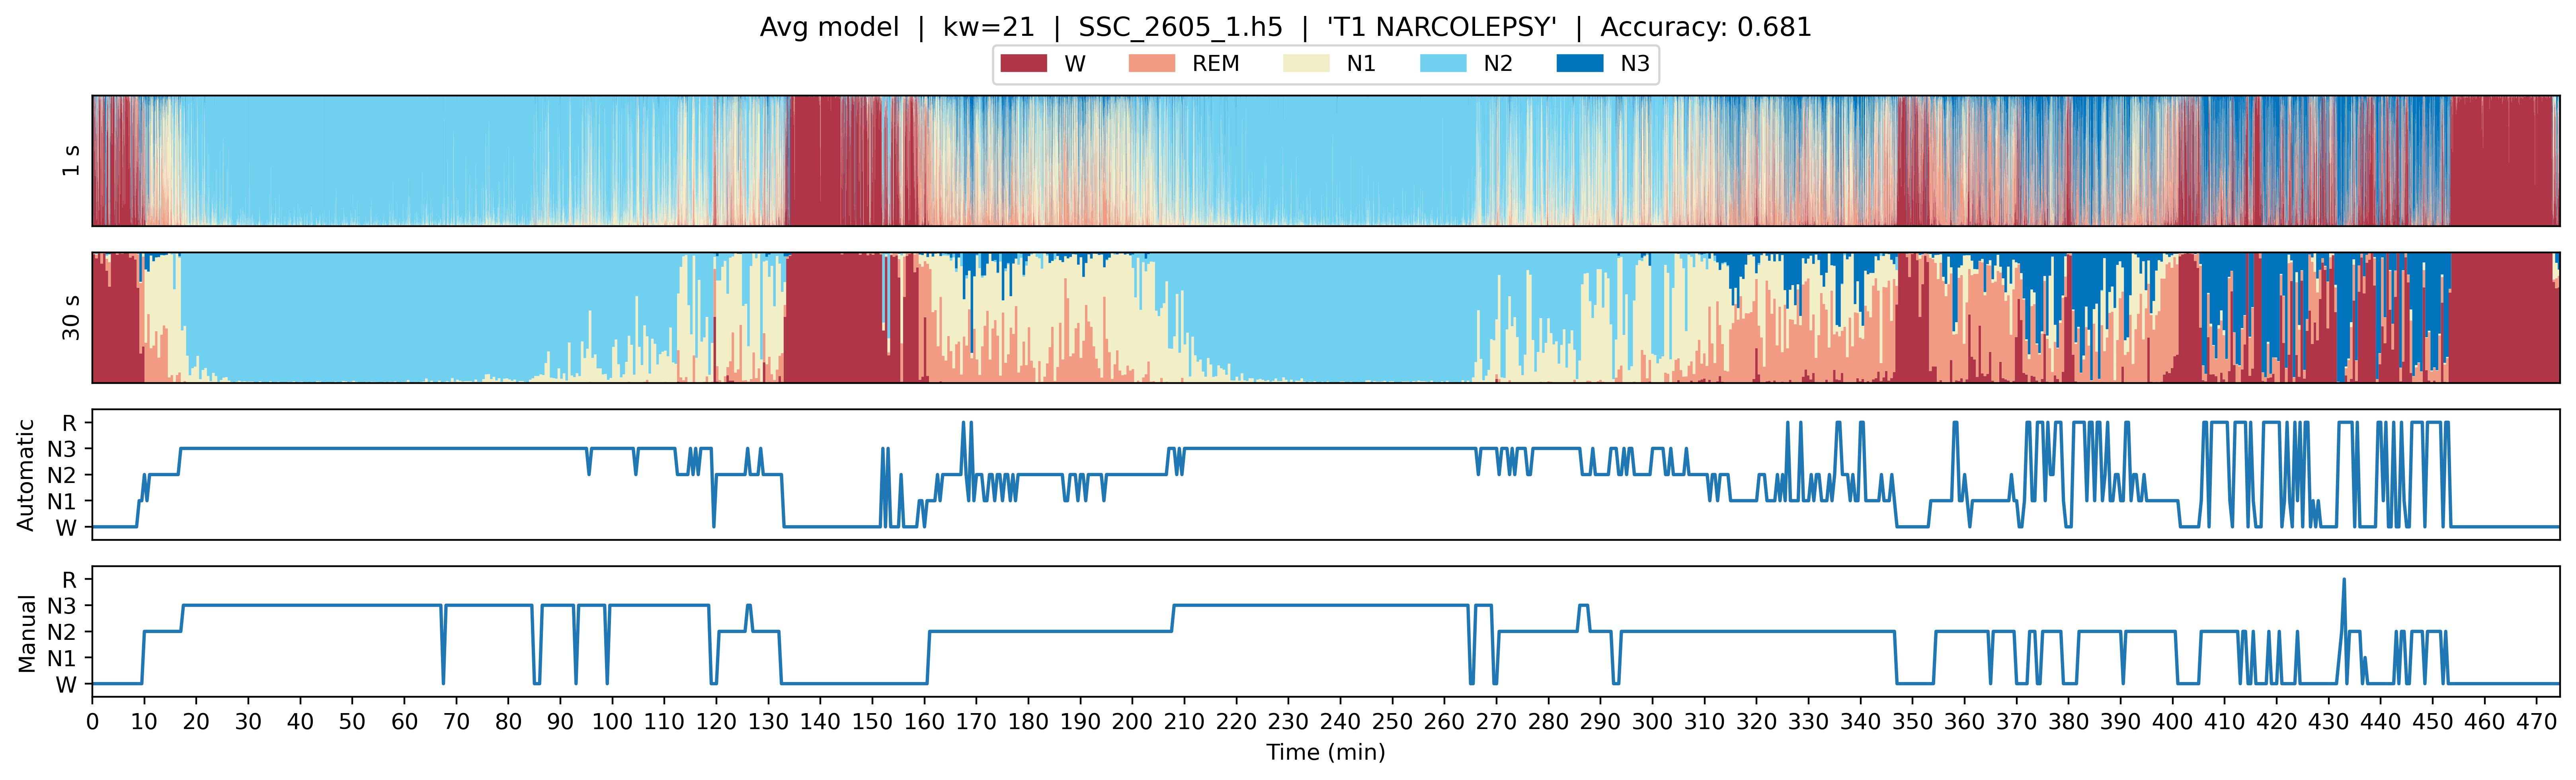

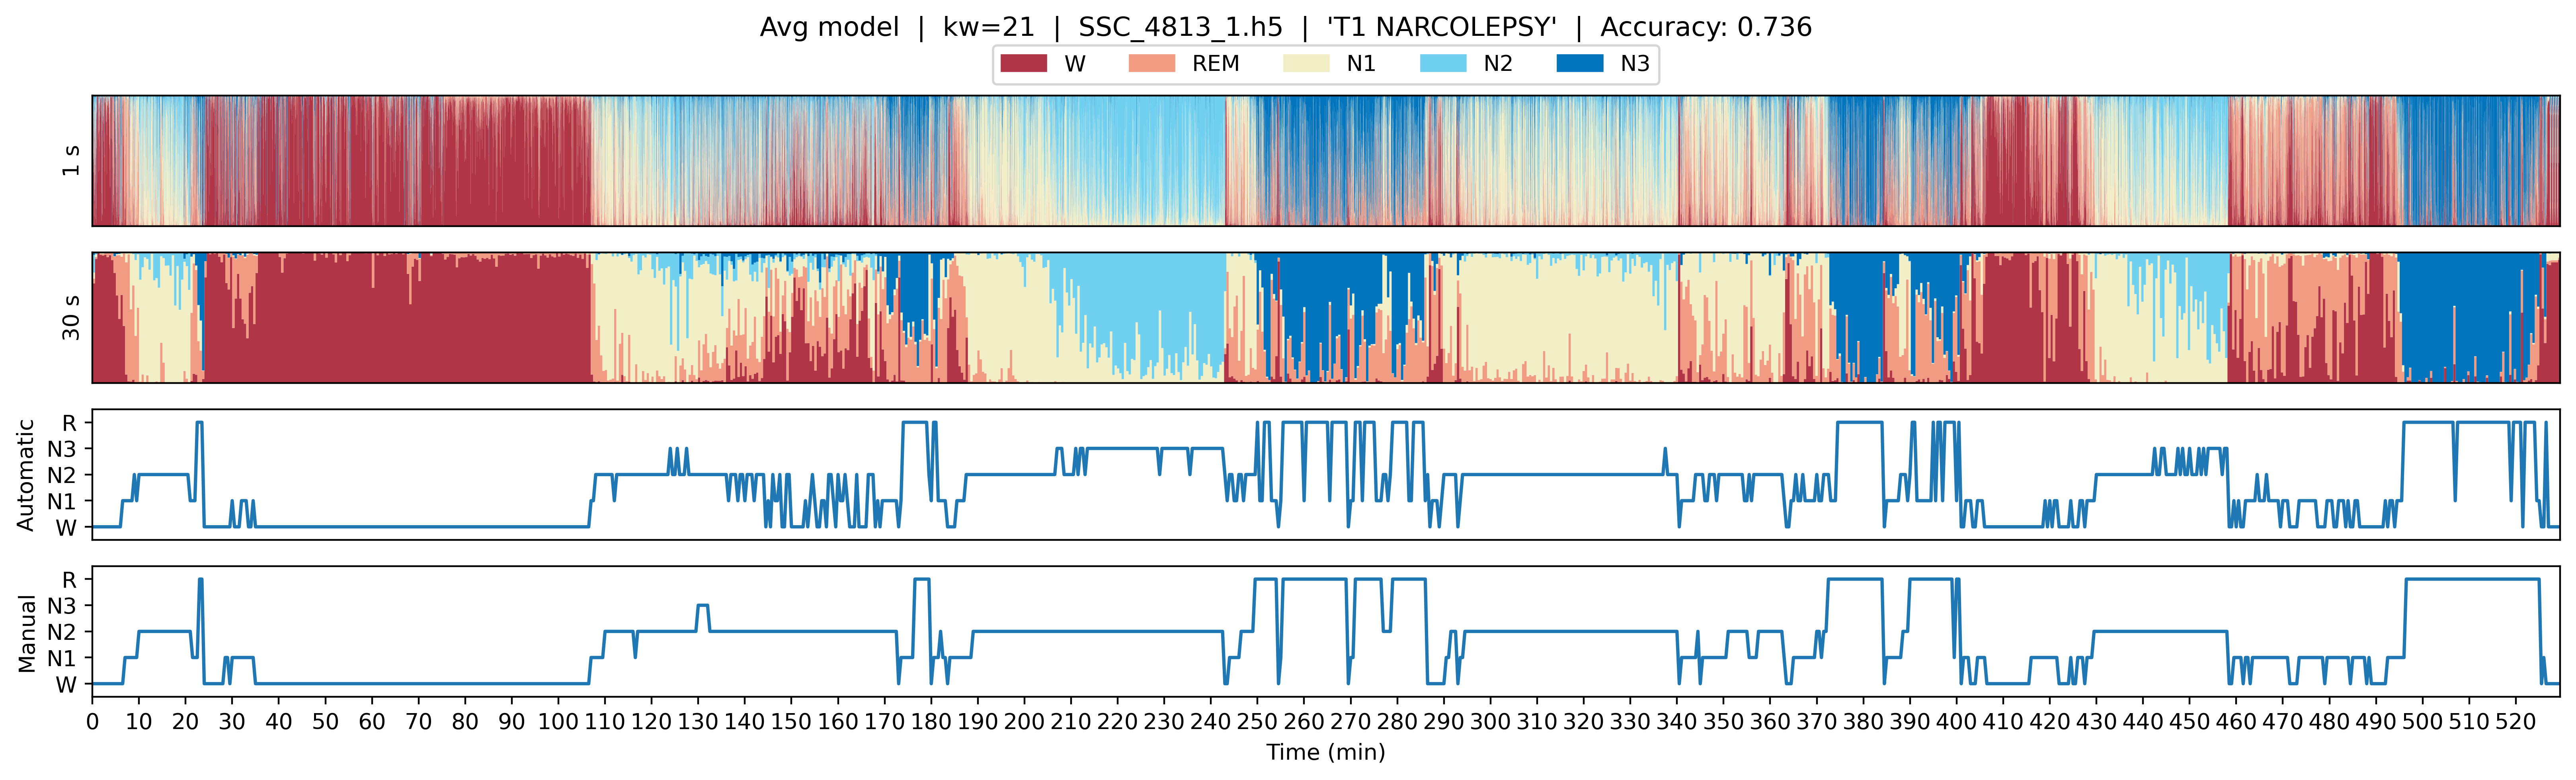

In [14]:
for selected_record in df_preds.query('Label == 1').sort_values('Accuracy', ascending=True).head()['FileID']:
    #     print(fid)
    # selected_record = 'SSC_5139_1.h5'
    record = predictions[selected_record]
    plot_hypnodensity(
        record['logits'], 
        record['predicted'], 
        record['true'], 
        title=("Avg model  |  " +
               "kw=21  |  " +
               f"{selected_record}  |  " +
               f"{df_preds.loc[df_preds['FileID'] == selected_record]['Diagnosis'].values[0]}  |  " +
               f"Accuracy: {df_preds.loc[df_preds['FileID'] == selected_record]['Accuracy'].values[0]:.3f}"),
        save_path=f"narcos/worst/{selected_record}_hypnodensity.png",
    )

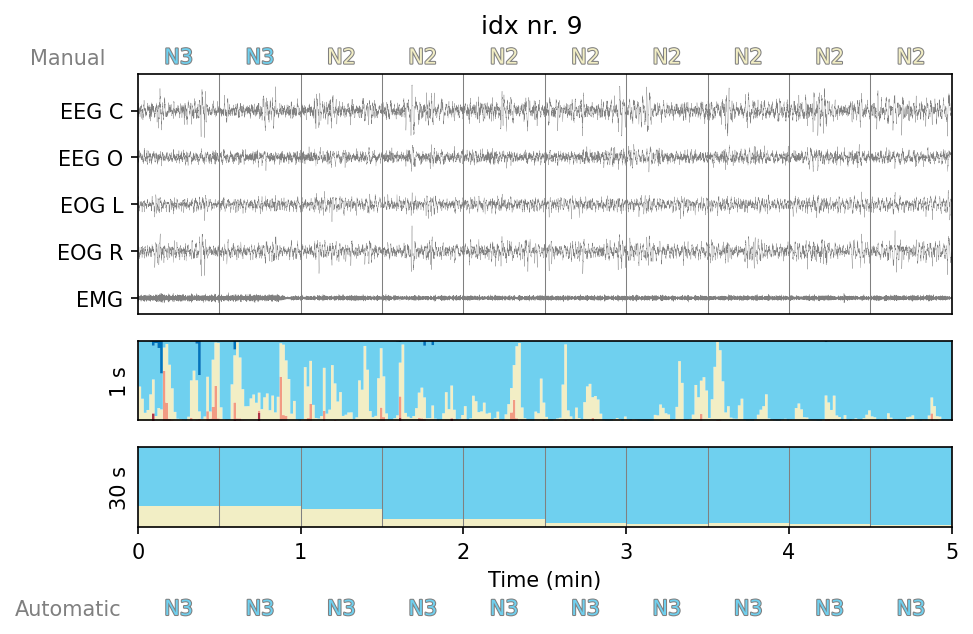

In [8]:
plot_psg_hypnogram_hypnodensity(
    selected_record, 
    record_predictions=record, 
    seq_idx=9, 
    interval=5
)

In [ ]:
plot_psg_hypnogram_hypnodensity(
    selected_record, 
    record_predictions=record, 
    seq_idx=8
)

In [ ]:
plot_psg_hypnogram_hypnodensity(
    selected_record, 
    record_predictions=record, 
    seq_idx=20,
    interval=10
)

In [ ]:
plot_psg_hypnogram_hypnodensity(
    selected_record, 
    record_predictions=record, 
    seq_idx=45,
    interval=5
)